## Simple Linear Regression

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_style('darkgrid')

/home/jimil/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load the data

In [2]:
data = pd.read_csv('sat.csv')
data.head()

,HS GPA,SAT Score
0,3.4,1270
1,4.0,1220
2,3.8,1160
3,3.8,950
4,4.0,1070


### Creating the first regression

<p>Define the dependent and independent variables</p>

In [3]:
y = data['HS GPA']
x1 = data['SAT Score']

<p>Explore the data</p>

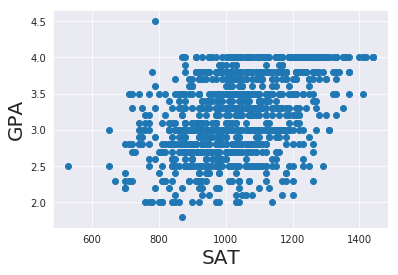

In [4]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()

<p>Implementing the regression</p>

In [5]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 HS GPA   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     225.9
Date:                Sat, 04 Jan 2020   Prob (F-statistic):           3.48e-46
Time:                        15:55:00   Log-Likelihood:                -704.91
No. Observations:                1000   AIC:                             1414.
Df Residuals:                     998   BIC:                             1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5179      0.113     13.406      0.000       1.296       1.740
SAT Score      0.0016      0.000     15.031      0.000       0.001       0.002
==============================================================================
Omnibus:                       21.668   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.786
Skew:                          -0.226   Prob(JB):                     0.000226
Kurtosis:                       2.555   Cond. No.                     7.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Explaining the results obtained above
<p>There are three tables in the summary from statsmodel: </p>
* The first table is a model summary table that describes the model
    * The <b>Dep. Variable</b> is the variable we are trying to predict
    * The OLS Model is the <b>Ordinary Least Squares Model</b>
    * The <b>Least Squares</b> method is closely related to the OLS model
    * The <b>R-squared</b> value is used to determine how powerful the regression is and is defined as variability explained by the regression <b>divided by</b> total variability of the dataset; increases as you increase the number of factors used for prediction
* The second table is the co-efficients table
    * The const coef is the value of the intercept (b0) for the regression line
    * The SAT Score coef is the slope of the regression line or b1 constant
    * The <b>[const][std err]</b> value is the value of the standard error of estimation
    * The <b>[t]</b> and <b>P>|t|</b> are the t and p statistics for the hypothesis testing [whether the variable is a useful variable or not]; the <b>[SAT Score][P>|t|] value</b> should be less than <b><i>0.05</i></b> because it signifies that SAT Scores are significant when predicting the GPA
* The last table is a summary of some additional tests performed with the model

<p>Plotting the regression line</p>

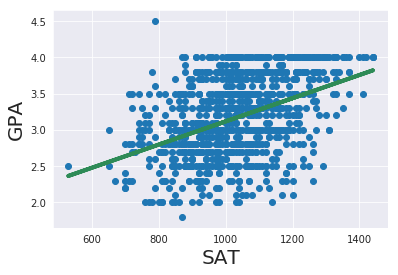

In [6]:
plt.scatter(x1,y)
yhat = 0.0016*x1 + 1.518
fig = plt.plot(x1,yhat,lw=4,color='seagreen',label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)
plt.show()